In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('StudentPerformanceFactors_Cleaned.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6373,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6374,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6375,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
categorical_columns = df.select_dtypes(include=["object"]).columns

In [16]:
label_encoder = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le

In [17]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6373,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6374,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6375,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


In [18]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [19]:
X

array([[23, 84,  1, ...,  1,  2,  1],
       [19, 64,  1, ...,  0,  1,  0],
       [24, 98,  2, ...,  2,  2,  1],
       ...,
       [20, 90,  2, ...,  2,  2,  0],
       [10, 86,  0, ...,  1,  0,  0],
       [15, 67,  2, ...,  2,  2,  1]])

In [20]:
y

array([67, 61, 74, ..., 68, 68, 64])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

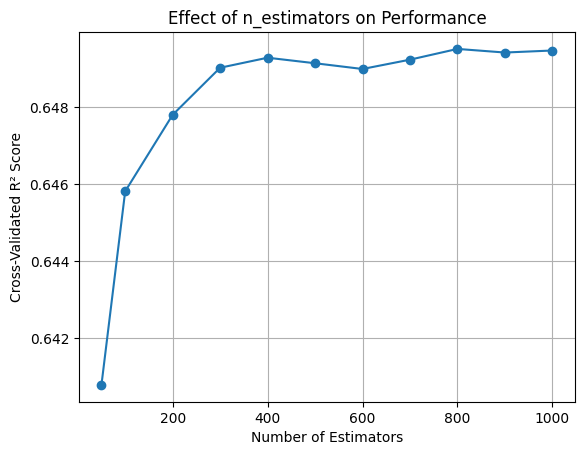

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
n_estimators_range = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
cv_scores = []
for n in n_estimators_range:
    regressor = RandomForestRegressor(n_estimators=n, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=0)
    scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated R² Score')
plt.title('Effect of n_estimators on Performance')
plt.grid()
plt.show()

In [62]:
import numpy as np
final_regressor = RandomForestRegressor(
    n_estimators=1200,  # Optimal number of trees
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=0,
    n_jobs=-1  # Parallelize computation
)

# Train the final model
regressor.fit(X_train, y_train)

# Evaluate with cross-validation
cv_scores = cross_val_score(final_regressor, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", np.mean(cv_scores))

# Feature Importance
importances = regressor.feature_importances_
print("Feature Importances:", importances)

Cross-Validation R2 Scores: [0.70140407 0.74850334 0.60441976 0.69842289 0.48110971]
Average R2 Score: 0.646771953761478
Feature Importances: [0.21324181 0.3372695  0.03072649 0.0309331  0.01369397 0.03636391
 0.08816559 0.0220496  0.00763081 0.04059671 0.02399158 0.01765118
 0.01160428 0.0241258  0.03370285 0.01180076 0.02252459 0.02056454
 0.01336294]


In [63]:
first_row_features = X[0].reshape(1,-1)
actual_outcome = y[0]
predicted_outcome = regressor.predict(first_row_features)
print("Actual outcome for the first row:", actual_outcome)
print("Preicted outcome for the first row:", predicted_outcome)

Actual outcome for the first row: 67
Preicted outcome for the first row: [67.5405]


In [64]:
second_row_features = X[1].reshape(1,-1)
actual_outcome = y[1]
predicted_outcome = regressor.predict(second_row_features)
print("Actual outcome for the second row:", actual_outcome)
print("Predicted outcome for the second row:", predicted_outcome)

Actual outcome for the second row: 61
Predicted outcome for the second row: [62.66075]


In [65]:
third_row_features = X[2].reshape(1,-1)
actual_outcome = y[2]
predicted_outcome = regressor.predict(third_row_features)
print("Actual outcome for the third row:", actual_outcome)
print("Predicted outcome for the third row:",predicted_outcome)

Actual outcome for the third row: 74
Predicted outcome for the third row: [73.646]


In [66]:
from sklearn.metrics import mean_absolute_error
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolute error is",mae)

Mean absolute error is 1.0888314840341846


In [67]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is", mse)

Mean Squared Error is 5.049314304218543


In [68]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error is ", rmse)

Root Mean Squared Error is  2.247067934936223


In [61]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
R_2 = r2_score(y_test,y_pred)
print("R squared score is",R_2)

R squared score is 0.6585486329943951
